# Technical Analysis of the Aircraft Accidents

## Business Objective 
To analyze and identify the lowest-risk aircraft options for the company’s entry into the aviation industry

In [173]:
#Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib as plt 

import warnings
warnings.filterwarnings('ignore')

Loading the data into a DataFrame called 'Aviation_Data.csv'

In [174]:
#Loading the data
df = pd.read_csv('Aviation_Data.csv')

Inspecting the data

In [175]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [177]:
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [178]:
df.shape

(90348, 31)

In [179]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [180]:
#Drop missing values

df.dropna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


Statistical Visualization

In [181]:
# Find the mean of the total Fatal Injuries
mean_total_fatal_injuries = df["Total.Fatal.Injuries"].mean()
mean_total_fatal_injuries

0.6478551517654346

In [182]:
#Find the data value that occurs most frequently under the 'Make' column
mode_make = df["Make"].mode()
mode_make

0    Cessna
Name: Make, dtype: object

In [183]:
#Find the data value that occurs most frequently under the 'Weather.Condition' column
mode_weather_onditions = df["Weather.Condition"].mode(0)
mode_weather_onditions

0    VMC
Name: Weather.Condition, dtype: object

In [184]:
median_injuries = df['Total.Fatal.Injuries'].median()
median_injuries

0.0

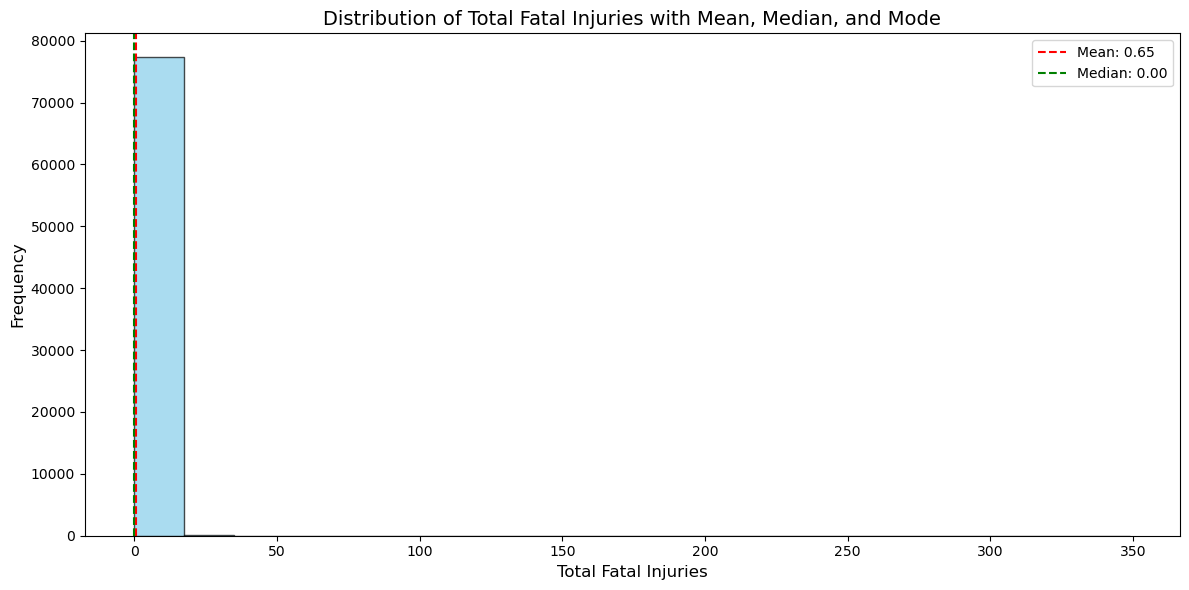

In [185]:
import matplotlib.pyplot as plt
import numpy as np

# Mean, median, and mode for Total.Fatal.Injuries
mean_total_fatal_injuries = df["Total.Fatal.Injuries"].mean()
median_total_fatal_injuries = df["Total.Fatal.Injuries"].median()


# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(df["Total.Fatal.Injuries"].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for mean, median, and mode
plt.axvline(mean_total_fatal_injuries, color='red', linestyle='--', label=f"Mean: {mean_total_fatal_injuries:.2f}")
plt.axvline(median_total_fatal_injuries, color='green', linestyle='--', label=f"Median: {median_total_fatal_injuries:.2f}")


# Adding title and labels
plt.title("Distribution of Total Fatal Injuries with Mean, Median, and Mode", fontsize=14)
plt.xlabel("Total Fatal Injuries", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Conclusion
The most frequent weather condition condition that occured during the aircraft accidents was VMC.
The aircraft make that had the most aircraft accidents was Cessna and the mean for the 'Total fatal Injuries was 0.64
